In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json
import json

# INFO dataframe


In [2]:
info_df = pd.read_csv('Data/superhero_info - superhero_info.csv')
info_df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [3]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [4]:
info_df['Hero|Publisher'].head(2)

0            A-Bomb|Marvel Comics
1    Abe Sapien|Dark Horse Comics
Name: Hero|Publisher, dtype: object

In [5]:
## save the 2 new columns into the dataframe
info_df[['Hero','Publisher']] = info_df['Hero|Publisher'].str.split('|',expand=True)
info_df.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [6]:
info_df = info_df.drop(columns=['Hero|Publisher'])
info_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [7]:
# Make a list of all characters to replace
to_replace = ['{','\'','Height','}','Weight', ':', ' cm', ' kg', '.0']
# run a loop to replace all of the characters in the list at once
for char in to_replace:
    info_df['Measurements'] = info_df['Measurements'].str.replace(char,'',regex=False)
    
info_df.head(5)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"203, 441",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"191, 65",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"185, 90",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"203, 441",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"193, 122",Absorbing Man,Marvel Comics


In [8]:
## save the 2 new columns into the dataframe
info_df[['Height in cm','Weight in kg']] = info_df['Measurements'].str.split(', ',expand=True)
info_df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height in cm,Weight in kg
0,Male,Human,good,No Hair,yellow,Unknown,"203, 441",A-Bomb,Marvel Comics,203,441
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"191, 65",Abe Sapien,Dark Horse Comics,191,65


In [9]:
info_df = info_df.drop(columns=['Measurements'])
info_df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height in cm,Weight in kg
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203,441
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191,65


In [10]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        463 non-null    object
 1   Race          463 non-null    object
 2   Alignment     463 non-null    object
 3   Hair color    463 non-null    object
 4   Eye color     463 non-null    object
 5   Skin color    463 non-null    object
 6   Hero          463 non-null    object
 7   Publisher     463 non-null    object
 8   Height in cm  463 non-null    object
 9   Weight in kg  463 non-null    object
dtypes: object(10)
memory usage: 36.3+ KB


In [11]:
# convert just columns "a" and "b"
info_df[["Height in cm", "Weight in kg"]] = info_df[["Height in cm", "Weight in kg"]].apply(pd.to_numeric)
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        463 non-null    object 
 1   Race          463 non-null    object 
 2   Alignment     463 non-null    object 
 3   Hair color    463 non-null    object 
 4   Eye color     463 non-null    object 
 5   Skin color    463 non-null    object 
 6   Hero          463 non-null    object 
 7   Publisher     463 non-null    object 
 8   Height in cm  463 non-null    float64
 9   Weight in kg  463 non-null    int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 36.3+ KB


# POWER dataframe


In [12]:
power_df = pd.read_csv('Data/superhero_powers - superhero_powers.csv')
power_df.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [13]:
power_df.loc[0, 'Powers']

'Agility,Super Strength,Stamina,Super Speed'

In [14]:
power_df['powers_split'] = power_df['Powers'].str.split(',', expand = False)
power_df['powers_split']

0        [Agility, Super Strength, Stamina, Super Speed]
1      [Accelerated Healing, Durability, Longevity, S...
2      [Agility, Accelerated Healing, Cold Resistance...
3                                   [Lantern Power Ring]
4      [Accelerated Healing, Intelligence, Super Stre...
                             ...                        
662               [Flight, Energy Blasts, Size Changing]
663    [Cold Resistance, Durability, Longevity, Super...
664    [Agility, Stealth, Danger Sense, Marksmanship,...
665    [Cryokinesis, Telepathy, Magic, Fire Control, ...
666    [Super Speed, Intangibility, Time Travel, Time...
Name: powers_split, Length: 667, dtype: object

In [15]:
exploded = power_df.explode('powers_split')

In [16]:
exploded

,hero_names,Powers,powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing
...,...,...,...
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...",Weather Control
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Super Speed
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Intangibility
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Time Travel


In [17]:
cols_to_make = exploded['powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [18]:
for col in cols_to_make:
    power_df[col] = power_df['Powers'].str.contains(col)
power_df.head(5)

C:\Users\robo1\anaconda3\envs\dojo-env\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,hero_names,Powers,powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
merged = pd.merge (info_df, power_df, left_on = 'Hero', right_on ='hero_names')
merged.head(5)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height in cm,Weight in kg,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122,...,False,False,False,False,False,False,False,False,False,False


# QUESTIONS

## Compare the average weight of super powers who have Super Speed to those who do not.

In [20]:
merged.groupby('Super Speed')['Weight in kg'].mean()

Super Speed
False    101.773585
True     129.404040
Name: Weight in kg, dtype: float64

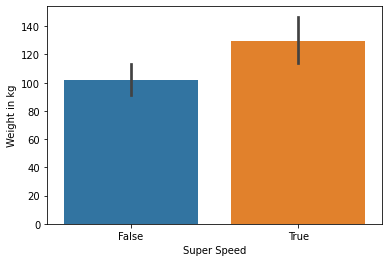

In [21]:
sns.barplot(data=merged, x='Super Speed', y='Weight in kg');

## What is the average height of heroes for each publisher?

In [22]:
merged.groupby('Publisher')['Height in cm'].mean()

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height in cm, dtype: float64

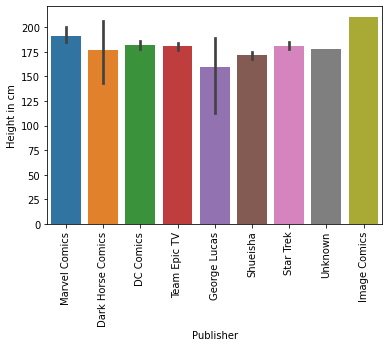

In [23]:
ax = sns.barplot(data=merged, x='Publisher', y='Height in cm')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);